<a href="https://colab.research.google.com/github/valesierrai/Integracion-de-Datos-y-Prospectiva/blob/main/Muestreo_VA_Montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Muestreo de Variables Aleatorias - Montecarlo**

##0. Cargamos Librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

import random as rnd #Libreria para los números aleatorios

Mounted at /content/drive


##1. Cargamos la Base de Datos (Archivo de Trabajo)

**Descripción de las Variables**
Esta base de datos de eventos de pérdida, posee dos variables:


1.   *Frecuencia:* Indica el número de eventos de pérdida por período de tiempo (semana, día, mes)
2.   *Severidad:* Indica el costo de cada evento de pérdida



In [ ]:
nxl = '/content/drive/MyDrive/Colab Notebooks/Integración de Datos y Prospectiva/Bases de Datos/3. FallasTecnologicas.xlsx'
XDB = pd.read_excel(nxl, sheet_name= 0)
XDB.head(100)

,Fechas,Eventos,Transaccion Promedio,Eventos-Fallo,Pérdida Promedio
0,Semana 1,80,14.8058,1,0.5374
1,Semana 2,105,56.4721,4,1.1978
2,Semana 3,70,9.9760,5,0.4269
3,Semana 4,105,18.2949,6,1.0814
4,Semana 5,130,23.4112,7,1.2105
...,...,...,...,...,...
95,Semana 96,115,25.2722,1,1.3816
96,Semana 97,75,8.8613,6,1.2785
97,Semana 98,85,19.7139,1,0.6788
98,Semana 99,80,1.4179,3,14.7925


In [ ]:
Xf = XDB.iloc[:,3] #Frecuencia
Xs = XDB.iloc[:,4] #Severidad
LDA = Xf * Xs #Distribución Agregada

In [ ]:
u = np.mean(LDA) #Limite superior pérdidas esperadas (Zona 1)
OpVar= np.percentile(LDA, 0.999) #Valor Asegurado OpVar (Zona 3)
PNE = (u+OpVar)/2 #Pérdidas Esperadas (Zona 2)

#Parámetros de Riesgo
print("Las pérdidas esperadas son:\n", u)
print("Las pérdidas no esparadas son:\n", PNE)
print("El valor de la poliza de aseguramiento:\n", OpVar)

Las pérdidas esperadas son:
 9.45111269614836
Las pérdidas no esparadas son:
 4.85836049807418
El valor de la poliza de aseguramiento:
 0.2656083


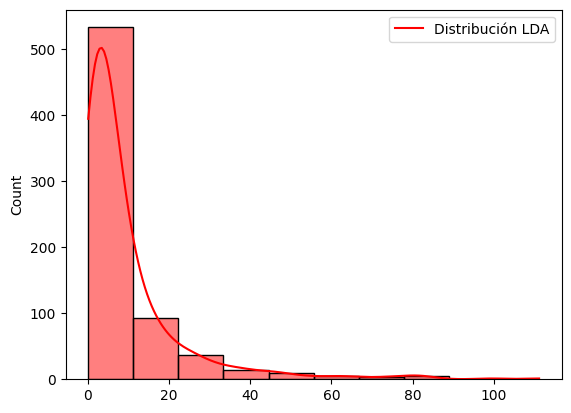

In [ ]:
#Graficamos
plt.figure()
sns.histplot(LDA,bins=10,kde=True, color='red')
plt.legend(['Distribución LDA'])
plt.show()

##2. Se procede con el muestreo de la variable

In [ ]:
counts, bin_edges= np.histogram(LDA, bins=10)

LI = bin_edges[:-1] #Limites Inferiores
LS = bin_edges[1:]  #Limites Superiores
mc= (LI+LS)/2 #Marca de Clase (Medias de Clase)

pdf= counts/sum(counts) #Nos entrega la frecuencia relativa (% de datos por intervalo)

cdf= np.cumsum(pdf) #Construimos la ruleta (el acumulado de las probabilidades)

In [ ]:
#Hacemos la Tabla
df= pd.DataFrame(np.column_stack((LI,LS,mc,pdf,cdf)))
df.columns= ['LI','LS','mc','pdf','cdf']
df.head(10)

,LI,LS,mc,pdf,cdf
0,0.14230,11.23637,5.689335,0.760342,0.760342
1,11.23637,22.33044,16.783405,0.132668,0.893010
2,22.33044,33.42451,27.877475,0.052782,0.945792
3,33.42451,44.51858,38.971545,0.019971,0.965763
4,44.51858,55.61265,50.065615,0.012839,0.978602
5,55.61265,66.70672,61.159685,0.007133,0.985735
6,66.70672,77.80079,72.253755,0.004280,0.990014
7,77.80079,88.89486,83.347825,0.007133,0.997147
8,88.89486,99.98893,94.441895,0.001427,0.998573
9,99.98893,111.08300,105.535965,0.001427,1.000000


##3. Se procede con el muestreo de la variable a una confiabilidad del 99%

In [ ]:
#Tamaño del Intervalo
TI= LS[0]-LI[0]

#Confiabilidad del 99% - 100 datos
LDAm=np.zeros((100,1))

for i in range(100):
  print("Interación:",i)
  aleatorio = rnd.random()
  print("El aleatorio es:", aleatorio)
  print("La lista de  números es:\n",cdf)
  print(aleatorio<cdf)
  intervalo = np.array(np.where(aleatorio<cdf))
  print("El intervalo de trabajo es:\n",intervalo[0,0])
  print("Los limites inferiores son:\n", LI)
  aleatorio2= rnd.random()
  print("El intervalo seleccionado es:\n", LI[intervalo[0,0]])
  LDAm[i]=LI[intervalo[0,0]]+TI*aleatorio2
  print("El valor muestreado es:", LDAm[i])

Interación: 0
El aleatorio es: 0.8705580187877019
La lista de  números es:
 [0.76034237 0.89300999 0.94579173 0.9657632  0.978602   0.98573466
 0.99001427 0.99714693 0.99857347 1.        ]
[False  True  True  True  True  True  True  True  True  True]
El intervalo de trabajo es:
 1
Los limites inferiores son:
 [ 0.1423  11.23637 22.33044 33.42451 44.51858 55.61265 66.70672 77.80079
 88.89486 99.98893]
El intervalo seleccionado es:
 11.236369999999999
El valor muestreado es: [17.97537268]
Interación: 1
El aleatorio es: 0.9144996661294088
La lista de  números es:
 [0.76034237 0.89300999 0.94579173 0.9657632  0.978602   0.98573466
 0.99001427 0.99714693 0.99857347 1.        ]
[False False  True  True  True  True  True  True  True  True]
El intervalo de trabajo es:
 2
Los limites inferiores son:
 [ 0.1423  11.23637 22.33044 33.42451 44.51858 55.61265 66.70672 77.80079
 88.89486 99.98893]
El intervalo seleccionado es:
 22.330439999999996
El valor muestreado es: [24.15822322]
Interación: 2
El

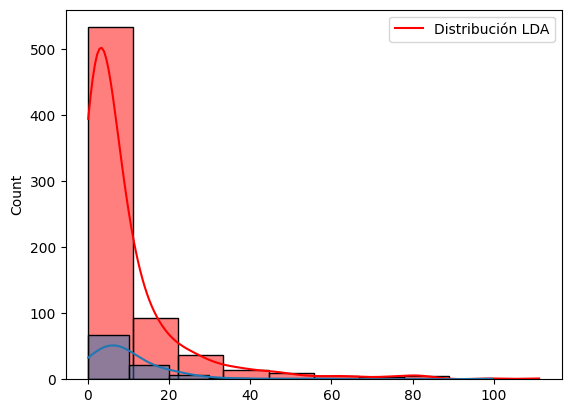

In [ ]:
#Graficamos
plt.figure()
sns.histplot(LDA,bins=10,kde=True, color='red')
sns.histplot(LDAm,bins=10,kde=True, color='green')
plt.legend(['Distribución LDA'])
plt.show()

##4. Análisis de Resultados

La base de datos utilizada para este estudio posee un total de 701 datos de eventos de riesgo semanales en transacciones fallidas en una entidad fintech (Macro). Los datos presentaron una media tal, una desviación tal, así como un coeficiente de asimetría tal, y un coeficiente de curtosis tal (Macro). Luego del muestreo a tres confiabilidades del 99%(100), 99,9% (1000), y 99,99% (10000), los valores de asimetría encontrados para cada confiabilidad fueron: cas100, cas1000, cas10000, muy similares o fueron muy diferentes a los valores originales, cual coeficiente de asimetría fue más parecido al de los datos originales, esto mismo se debe hacer para el coeficiente de curtosis. Tanto los datos originales como los datos muestreados responden de acuerdo con su coeficiente de asimetría y su coeficiente de curtosis a distribuciones tale sy tales. Es importante mencionar que si los coeficientes de asimetría fueron positivos, esto es indicador de pérdidas esperadas mucho más altas, y pérdidas catastróficas mucho menos (OpVar).